In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
# import feather
# this file is for demo only 2018.01.yellow car

In [18]:
# yellow taxis
y_1801 = pd.read_csv("../raw_data/yellow_tripdata_2018-09.csv")

In [19]:
# preprocessing
# get rid of passeenger_count = 0
y_1801 = y_1801[y_1801['passenger_count'] != 0]

# get rid of trip_distance = 0
y_1801 = y_1801[y_1801['trip_distance'] != 0]

# get rid of fare_amount(total_amount) < 2.5
y_1801 = y_1801[y_1801['fare_amount'] >= 2.5]

#  invalid payment_type (3,6)
y_1801 = y_1801[(y_1801['payment_type'] != 3) & (y_1801['payment_type'] != 6)]

# get rid of PULocationID & DOLocationID not in [1,265]
y_1801 = y_1801[(y_1801['PULocationID'] >= 1) & (y_1801['DOLocationID'] >= 1)&(y_1801['PULocationID'] <= 265) & (y_1801['DOLocationID'] <=265)]

# get rid of out-of-scope time
y_1801 = y_1801[(y_1801['tpep_pickup_datetime'].str[6] == '9') & (y_1801['tpep_pickup_datetime'].str[0:4] == '2018')]



In [20]:
y_1801.sort_values('tpep_pickup_datetime')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
14069,2,2018-09-01 00:00:00,2018-09-01 00:00:00,2,4.81,1,N,148,263,1,16.5,0.5,0.5,4.45,0.00,0.3,22.25
83848,2,2018-09-01 00:00:00,2018-09-01 00:00:00,1,19.21,2,N,132,263,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56
689,1,2018-09-01 00:00:00,2018-09-01 00:22:41,1,6.60,1,N,211,198,2,22.0,0.5,0.5,0.00,0.00,0.3,23.30
4736,2,2018-09-01 00:00:00,2018-09-01 00:48:02,1,8.65,1,N,163,36,2,35.5,0.5,0.5,0.00,0.00,0.3,36.80
9303,1,2018-09-01 00:00:01,2018-09-01 00:05:49,1,0.70,1,N,140,141,1,5.5,0.5,0.5,1.35,0.00,0.3,8.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040095,1,2018-09-30 23:59:55,2018-10-01 00:07:20,1,1.90,1,N,162,79,1,8.0,0.5,0.5,1.85,0.00,0.3,11.15
8036173,1,2018-09-30 23:59:56,2018-10-01 00:13:54,1,2.40,1,N,186,224,1,11.0,0.5,0.5,2.45,0.00,0.3,14.75
8035589,1,2018-09-30 23:59:56,2018-10-01 00:06:29,1,1.00,1,N,186,246,1,6.5,0.5,0.5,2.30,0.00,0.3,10.10
8036441,2,2018-09-30 23:59:58,2018-10-01 00:09:51,1,1.56,1,N,186,107,1,8.5,0.5,0.5,1.96,0.00,0.3,11.76


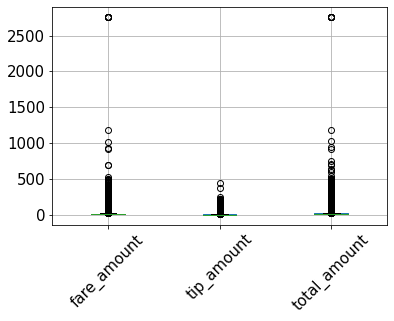

In [5]:
amount = ['fare_amount', 'tip_amount', 'total_amount']
amount_boxplot = y_1801.boxplot(column = amount, rot = 45, fontsize = 15)

In [7]:
# y_1801[(y_1801['extra'] != 0) & (y_1801['extra'] != 0.5) & (y_1801['extra'] != 1)]
# 存疑，extra可以有除了0.5和1和0之外的数字？

In [21]:
Q1 = y_1801.quantile(0.25)
Q3 = y_1801.quantile(0.75)
IQR = Q3 - Q1
clean_y_1801 = y_1801[~((y_1801 < (Q1 - 5 * IQR)) |(y_1801 > (Q3 + 5 * IQR))).any(axis=1)]


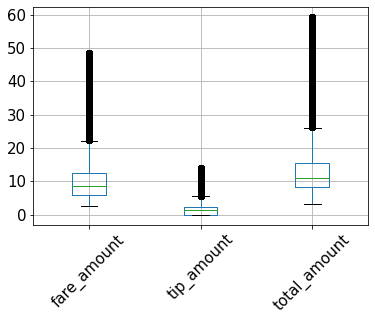

In [8]:
clean_fee_boxplot = clean_y_1801.boxplot(column = amount, rot = 45, fontsize = 15)

In [22]:
clean_y_1801.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [23]:
clean_y_1801

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-09-01 00:01:35,2018-09-01 00:09:48,2,1.50,1,N,161,107,1,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,1,2018-09-01 00:22:22,2018-09-01 00:28:55,1,1.00,1,N,233,100,1,6.5,0.5,0.5,2.00,0.0,0.3,9.80
2,1,2018-09-01 00:38:10,2018-09-01 00:44:42,1,1.00,1,N,164,163,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
3,1,2018-09-01 00:46:36,2018-09-01 00:54:49,1,1.90,1,N,48,140,1,8.5,0.5,0.5,1.00,0.0,0.3,10.80
4,1,2018-09-01 00:59:46,2018-09-01 01:02:41,1,0.60,1,N,262,263,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040128,2,2018-09-30 23:06:44,2018-09-30 23:12:40,1,1.07,1,N,239,142,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
8040129,2,2018-09-30 23:15:34,2018-09-30 23:18:31,1,0.75,1,N,142,163,1,4.5,0.5,0.5,1.74,0.0,0.3,7.54
8040130,2,2018-09-30 23:32:19,2018-09-30 23:41:33,2,2.42,1,N,234,161,1,9.5,0.5,0.5,2.16,0.0,0.3,12.96
8040131,2,2018-09-30 23:03:59,2018-09-30 23:14:09,1,1.99,1,N,262,238,1,9.5,0.5,0.5,0.00,0.0,0.3,10.80


In [24]:
clean_y_1801.reset_index().to_feather('../preprocessed_data/y_1809.feather')